## EXE - 3
### Submitted by:
### Jasmeet Kaur
### Student ID: 100881373

_____________________________________________________________________________________________________________________________

Table of Contents:
1. Business Problem
2. Importing the Dataset
3. Exploratory Data Analysis (EDA) <br>
  3.1 Data Overview <br>
  3.2 Data Cleaning/ Data wrangling (Deleting Duplicate Lines, Dropping irrelevant columns etc.)<br>
  3.3 EDA Report for Statistical Analysis <br>
  3.4 Report: Making Donought chart for college/ university Classification in data <br>
  3.5 Statistical Analysis <br>
  3.6 Correlation Map <br>
4. Data Preprocessing
  4.1 Outlier Management <br>
  4.2 Feature Engineering and Selection <br>
5. Model Preparation
  5.1 Splitting the dataset into Train and Test Sets <br>
  5.2 Feature Scaling <br>
6. Machine Learning Models
  6.1 LOGISTIC REGRESSION MODEL <br>
     6.1.1 6.1.1 Building Model <br>
     6.1.2 Assessing the model <br>
7. PCA
  7.1 Calculating number of dimensions required to preserve 90% variance <br>
  7.2 Reducing Dimension using PCA <br>
  7.3 Splitting data <br>
  7.4 Building and visualizing a logistic regression model <br>
  7.5 Assessing the performance
  
8. Cross Validation 
9. Summary :Comparison of Logistic Regression Models
10. Conclusion


## 1. Business Problem
Data analysis consolidates information to provide the big picture of trends and patterns for higher education leadership teams that can be used to evaluate and streamline processes, create efficiencies, and improve the overall student experience. The notebook uses Logistic Regression to analyse what factors impact choice of students in selection of Private or Non Private College/ Universities in US. The notebook uses Logistic regression to study the relationship between various factors and student selection of private or non private College/ Universities and predict the student preferance for Private or Non Private College/ Universities in US based on the factors.

<b>Dataset Information:</b><br>
The dataset provides Statistics for a large number of US Colleges from the 1995 issue of US News and World Report. The data frame has 777 observations on the following 18 variables.

1. Private: A factor with levels No and Yes indicating private or public university
2. Apps: Number of applications received
3. Accept: Number of applications accepted
4. Enroll: Number of new students enrolled
5. Top10perc: Pct. new students from top 10% of H.S. class
6. Top25perc: Pct. new students from top 25% of H.S. class
7. F.Undergrad: Number of fulltime undergraduates
8. P.Undergrad: Number of parttime undergraduates
9. Outstate: Out-of-state tuition
10. Room.Board: Room and board costs
11. Books: Estimated book costs
12. Personal: Estimated personal spending
13. PhD: Pct. of faculty with Ph.D.’s
14. Terminal: Pct. of faculty with terminal degree
15. S.F.Ratio: Student/faculty ratio
16. perc.alumni: Pct. alumni who donate
17. Expend: Instructional expenditure per student
18. Grad.Rate: Graduation rate

<b> Source: </b>
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the ASA Statistical Graphics Section’s 1995 Data Analysis Exposition.

### Importing required modules

In [1]:
!pip install sweetviz
import sweetviz as sv
import numpy as np 
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import  Image
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor


## 2. Importing the dataset

In [2]:
#Reading the dataset stored as a .csv file.
dataset = pd.read_csv("C:/Users/100902467/Desktop/AI Algo/EX- 3_JasmeetKaur(100881373)/College.csv")

#Displaying the first five rows of the dataset.
dataset.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## 3. Exploratory Data Analysis

#### 3.1 Data overview

In [3]:
# Basic data statistics
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().sum().values.sum())
print ("Unique values  :  \n",dataset.nunique())



Rows     :  777
Columns  :  19

Features : 
 ['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']

Missing values :   0
Unique values  :  
 Unnamed: 0     777
Private          2
Apps           711
Accept         693
Enroll         581
Top10perc       82
Top25perc       89
F.Undergrad    714
P.Undergrad    566
Outstate       640
Room.Board     553
Books          122
Personal       294
PhD             78
Terminal        65
S.F.Ratio      173
perc.alumni     61
Expend         744
Grad.Rate       81
dtype: int64


#### 3.2 Data Cleaning/ Data wrangling

In [4]:
# Dropping Unnamed: 0 column as College/University
dataset = dataset.rename(columns = {'Unnamed: 0':'College/University'})
dataset.head()

,College/University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
#Separating private and non private colleges/universities.
private     = dataset[dataset["Private"] == "P"]
non_private = dataset[dataset["Private"] == "NP"]

#Assigning numercial values to catagorical target column.
dataset['Private'] = dataset['Private'].map({'Yes':1,'No':0})



In [6]:
# Deleting Duplicate Lines and keeping last record
dataset = dataset.drop_duplicates(keep='last')
#Checking number of rows
dataset.shape[0]

777

##### The number of rows is same as before so no duplicate records were there in dataset

#### 3.3 EDA Report for Statistical Analysis

#### 3.3.1 Using sweetviz module to generate html report
The analyze module will be used to generate report

In [7]:
eda_report = sv.analyze(dataset)
eda_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### From the report it can be seen that all features have no missing values. Also, all variables except the Target variable 'Private' i.e. all feature labels have no zeros and 'Private' has zeros as it is binary variable

#### 3.4 Report: Making Donought chart for college/ university Classification in data

In [8]:
l = ['Private', 'Non Private']
v = dataset["Private"].value_counts().values.tolist()

trace = go.Pie(labels = l, values = v,
               marker = dict(colors =  [ 'blue' ,'orange'], line = dict(color = "white", width =  1.3)),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "College Classification in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

<b> Conclusion </b>: The dataset contains information of patients where 72.7% are Private College and 27.3% are non Private college


#### 3.5 Statistical Analysis

##### 3.5.1 Statistical Summary: 
Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. It shows the data type of variables and count of non null values for the variables

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   College/University  777 non-null    object 
 1   Private             777 non-null    int64  
 2   Apps                777 non-null    int64  
 3   Accept              777 non-null    int64  
 4   Enroll              777 non-null    int64  
 5   Top10perc           777 non-null    int64  
 6   Top25perc           777 non-null    int64  
 7   F.Undergrad         777 non-null    int64  
 8   P.Undergrad         777 non-null    int64  
 9   Outstate            777 non-null    int64  
 10  Room.Board          777 non-null    int64  
 11  Books               777 non-null    int64  
 12  Personal            777 non-null    int64  
 13  PhD                 777 non-null    int64  
 14  Terminal            777 non-null    int64  
 15  S.F.Ratio           777 non-null    float64
 16  perc.alu

From the above results it can be inferred all the features except diagnosis are of floating type. Only Private is a binary object. Also none of the feature contains null value and have all 777 records.

##### 3.5.2 Displaying Descriptive statistics
Dataframe.describe() method is used for Descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [10]:
dataset.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#### 3.6 Correlation Map

In [11]:
#Forming target and features
#target includes Private column with P or NP values
target = dataset.Private
# drop the column 'College/University' in feature as it is does not convey any useful info
# drop 'Private' from features since we are separating labels and features 
# list includes our features
features = dataset.drop('Private',axis = 1)
features = dataset.drop('College/University',axis = 1)

<AxesSubplot:>

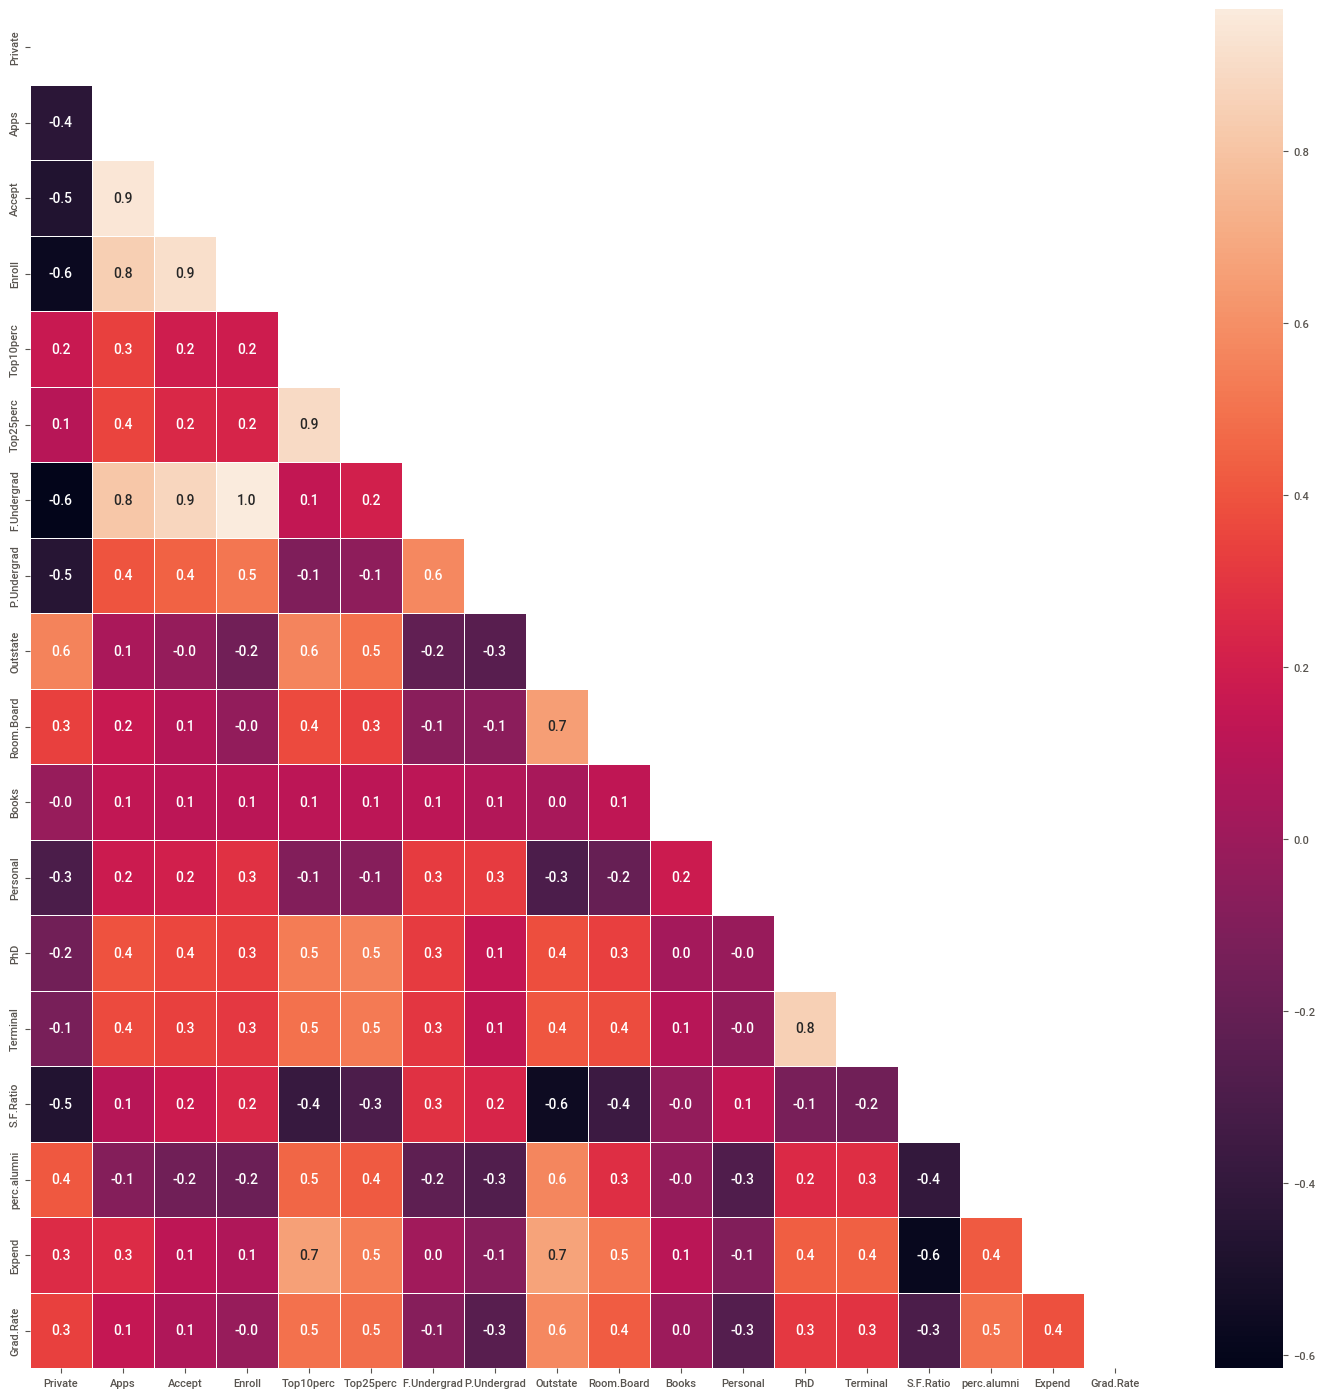

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(features.corr())
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

<b> Conclusion: </b>
The S.F Ratio, P. Undergrad, F.Unergrad, Apps, Accept, Enroll are highly correlated amongst each other (correlation > 0.8). This correlation can be used to select features in Feature Engineering

#### 3.7 Analysing Distribution of Features

In [13]:
skewness = pd.DataFrame(dataset.skew(), columns = ['skewness'])
skewness

,skewness
Private,-1.021933
Apps,3.723750
Accept,3.417727
Enroll,2.690465
Top10perc,1.413217
Top25perc,0.259340
F.Undergrad,2.610458
P.Undergrad,5.692353
Outstate,0.509278
Room.Board,0.477356


In [14]:
skewness['skewness'] = ["Positively skewed" if i >= 1 else "Negatively skewed" if i <= -1 else "Normal Distribution" for i in skewness['skewness']]
skewness

,skewness
Private,Negatively skewed
Apps,Positively skewed
Accept,Positively skewed
Enroll,Positively skewed
Top10perc,Positively skewed
Top25perc,Normal Distribution
F.Undergrad,Positively skewed
P.Undergrad,Positively skewed
Outstate,Normal Distribution
Room.Board,Normal Distribution


<b>There are many skewed features on data. We must solve this issue too. This will be solved via Standardization in Data Preprocessing</b>

## 4. Data Preprocessing

#### 4.1 Outlier Management

Local Outlier Factor method will be used to detect outliers and drop them
Density based Outlier Detection: Local Outlier Factor (LOF) : Compare local density of one point to local density of its K-NN
LOF > 1 ==> outlier / anomaly
LOF < 1 ==> inlier

In [15]:
y = dataset['Private']
x = dataset.drop(['Private','College/University'], axis = 1)
columns = x.columns.tolist()

In [16]:
# displaying columns
columns

['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

In [17]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x) # Returns -1 for anomalies/outliers and +1 for inliers.
X_score = clf.negative_outlier_factor_
X_score

array([-1.14099425, -1.12141518, -0.99796462, -1.30800392, -1.30342389,
       -1.13957956, -1.09139512, -0.99824868, -0.9879001 , -1.00483356,
       -0.99474117, -0.99943286, -1.0074971 , -0.96972676, -1.22411839,
       -1.02132782, -1.29571383, -1.03678387, -1.25819091, -1.03825981,
       -1.96024677, -1.0600041 , -1.08387549, -1.42687967, -1.69336436,
       -1.07398521, -1.19708302, -0.99350486, -1.03183206, -0.9959904 ,
       -1.07513587, -1.07089916, -0.99931998, -1.07701834, -1.12350093,
       -1.04849788, -1.03626025, -1.24037469, -1.6270878 , -1.0655168 ,
       -1.02652791, -1.01970388, -1.11250534, -1.08945018, -1.00111216,
       -1.11658238, -1.08169306, -1.41449529, -1.14642369, -1.3574515 ,
       -0.97231416, -0.98262873, -1.10489161, -1.10069282, -0.9830607 ,
       -1.20763454, -1.01641784, -1.00573508, -0.98281854, -1.46125819,
       -1.1472671 , -0.99510601, -1.18529757, -1.37296215, -1.03969381,
       -1.20773272, -1.09906043, -0.97332854, -0.97009238, -1.79

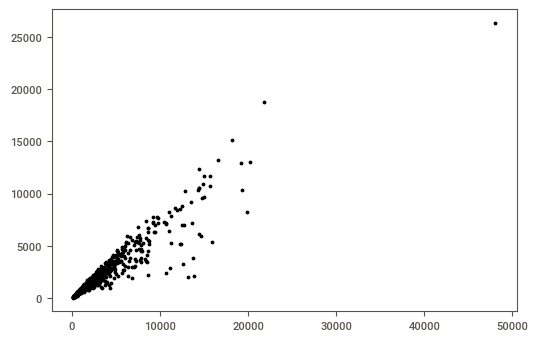

In [18]:
# Plotting points for Apps and Accept as example plots
plt.figure()
# radius_mean and texture_mean as an example plot
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Point')
plt.show()

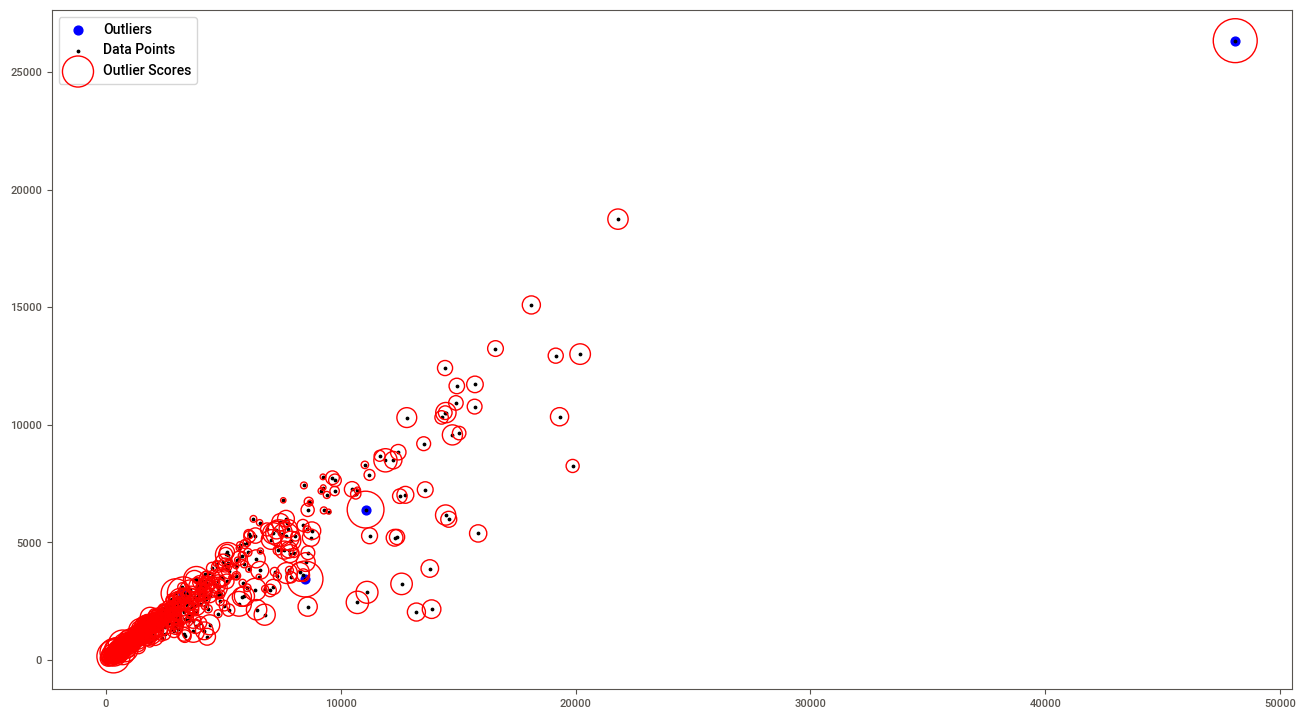

In [19]:
# plotting outliers based on threshold
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

# threshold for negative lof values
threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()

# Let's plot the outliers based on threshold we set
plt.figure(figsize = (16, 9))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = 'blue', s = 40, label = 'Outliers')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Points')
# Normalization
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())  
plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [20]:
# Dropping records pertaining to outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index)

In [21]:
x.shape

(771, 17)

<b> Conclusion: </b> 6 records identified as outliers were dropped

#### 4.2 Feature Engineering and Selection

From the correlation matrix we saw earlier, it was clear that there are quite a few features with very high correlations. So I dropped one of the features, from each of the feature pairs which had a correlation greater than 0.95. 

In [22]:
# Create correlation matrix
corr_matrix = x.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
x = x.drop(x[to_drop], axis=1)
# Displaying remaining features
x.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'P.Undergrad',
       'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal',
       'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

## 5. Model Preparation

#### 5.1 Splitting the dataset into Train and Test Sets

In [23]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#### 5.2 Feature Scaling
sklearn’s Robust Scaler was used to scale the features of the dataset. The centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.

In [24]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 6. Machine Learning Models

### 6.1 LOGISTIC REGRESSION MODEL

#### 6.1.1 Building Model

In [25]:
# Building Logistic Regression
# Importing libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression()

#### 6.1.2 Assessing the model

In [26]:
#Predict the response for test dataset
y_pred_lt = logreg.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of the Logistic Regression model is :",metrics.accuracy_score(y_test, y_pred_lt))

Accuracy of the Logistic Regression model is : 0.9439655172413793


## 7. PCA

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

#### 7.1 Calculating number of dimensions required to preserve 90% variance

#### 7.2 Reducing Dimension using PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
X = pca.transform(x)

In [28]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 1


In [29]:
#Displaying X array values
X

array([[-4145.09912087,  -373.90669781],
       [ 1839.99141731, -1180.98598642],
       [ -644.6841915 , -1999.46138742],
       ...,
       [-3156.03700648,   247.94784803],
       [31401.35715105,  2073.07989149],
       [-7174.16706347,  1929.61309352]])

In [30]:
#Checking shape of X
X.shape

(771, 2)

###### generating a data frame from this two dimesional data `X` that we generated:

In [31]:
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature 1', 'Feature 2', 'Label'])

In [32]:
#Displaying first 5 contents of df 
df.head()

,Feature 1,Feature 2,Label
0,-4145.099121,-373.906698,1.0
1,1839.991417,-1180.985986,1.0
2,-644.684191,-1999.461387,1.0
3,8308.034777,-4201.345085,1.0
4,-1344.926544,-2378.989877,1.0


###### Building Scatter plot for two features and Label

In [33]:
fig = px.scatter(df, x='Feature 1', y='Feature 2', color='Label')
fig.show()

###### The Scatterplot shows the used features are independent and can be used in model building

creating  {−1,+1}  labels for our data from y and assign it to (vector) variable y_pca. We use LabelEncoder from scikit-learn again to transform labels into -1s or +1s:

In [34]:
from sklearn.preprocessing import LabelEncoder
y = (2 * LabelEncoder().fit_transform(y)) - 1

In [35]:
#Displaying contents of y_pca
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1

In [36]:
#Checking Shape of y_pca
y.shape

(771,)

Now, we can plot our training data in 3D with a 3D scatter plot (we are going to use surface plots afterwards and the new interface of plotly cannot do surface plots yet, so we are using the older style rather than plotly express):

In [37]:
points_colorscale = [
                     [0.0, 'rgb(239, 85, 59)'],
                     [1.0, 'rgb(99, 110, 250)'],
                    ]

layout = go.Layout(scene=dict(
                              xaxis=dict(title='Feature 1'),
                              yaxis=dict(title='Featrue 2'),
                              zaxis=dict(title='Label')
                             ),
                  )

points = go.Scatter3d(x=df['Feature 1'], 
                      y=df['Feature 2'], 
                      z=y,
                      mode='markers',
                      text=df['Label'],
                      marker=dict(
                                  size=3,
                                  color=y,
                                  colorscale=points_colorscale
                            ),
                     )

fig2 = go.Figure(data=[points], layout=layout)
fig2.show()

#### 7.3 Splitting data

Now, let's split our data into training, validation and test sets. We don't need validation data in this example and we won't be doing model selection here. So, let's use 70% and 30% for training test data, repectively.

In [38]:
(X_train1, X_test1, y_train1, y_test1) = train_test_split(X, y, test_size=0.3, random_state=0)

#### 7.4 Building and visualizing a logistic regression model

Let's build our logistic regression model then by creating an object of the `LogisticRegression` class and assign the name `logreg1` to the resulting object. 

In [39]:
logreg1 = LogisticRegression()

Fitting `logreg1` to `X_train` and `y_train`:

In [40]:
logreg1.fit(X_train1, y_train1)

LogisticRegression()

Let's visualize the surface generated by our logistic regression model. First, we need to generate a number of points required for creating a visualization of the decision surface

In [41]:
detail_steps = 100

(x_vis_0_min, x_vis_1_min) = X_train1.min(axis=0)
(x_vis_0_max, x_vis_1_max) = X_train1.max(axis=0)

x_vis_0_range = np.linspace(x_vis_0_min, x_vis_0_max, detail_steps)
x_vis_1_range = np.linspace(x_vis_1_min, x_vis_1_max, detail_steps)

(XX_vis_0, XX_vis_1) = np.meshgrid(x_vis_0_range, x_vis_0_range)

X_vis = np.c_[XX_vis_0.reshape(-1), XX_vis_1.reshape(-1)]

We need to predict the probability associated with points in this generated data in order to visualize it. You can get the probabilities associated with belonging to classes by predict_proba method. Let's use that to calculate probabilities for points in X_vis. Use predict_proba just like predict to predict probabilities instead of actual classes. Go ahead and do that now, and assign the result to variable probs:

In [42]:

probs = logreg1.predict_proba(X_vis)


In [43]:
#checking the shape of this variable `probs`:
probs.shape

(10000, 2)

In [44]:
#Displaying contents of probs
probs

array([[0.00896716, 0.99103284],
       [0.00716868, 0.99283132],
       [0.00572882, 0.99427118],
       ...,
       [0.99611464, 0.00388536],
       [0.99513584, 0.00486416],
       [0.99391198, 0.00608802]])

As you can see, it has two column, because it gives the probability of belonging to each of the two classes. However, we care only about the probability of belonging to the positive class, so we can only choose the cloumn with index 1. Also, the probabilities will be in  [0,1]  while our labels are  {+1,1} , so we will transform the probabilities to be in range  [−1,+1] :

In [45]:
yhat_vis = (2 * probs[:, 1]) - 1

Now, we can transfrom `yhat_vis` into the shape required for a surface plot and plot away:

In [46]:
YYhat_vis = yhat_vis.reshape(XX_vis_0.shape)

surface_colorscale = [
                      [0.0, 'rgb(235, 185, 177)'],
                      [1.0, 'rgb(199, 204, 249)'],
                     ]

surface = go.Surface(
                     x=XX_vis_0, 
                     y=XX_vis_1,
                     z=YYhat_vis,
                     colorscale=surface_colorscale,
                     showscale=False
                    )

fig3 = go.Figure(data=[points, surface], layout=layout)
fig3.show()

#### We can see that logistic regression has fit a surface to our data that is has the logistic (or Sigmoid) function as its intersection.

### 7.5 Assessing the performance

Let's check our accuracies next. First, the training accuracy. For that let's get the predictions of training data. 

In [47]:
#Predict the response for test dataset
y_pred_lt1 = logreg1.predict(X_test1)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of the Logistic Regression model after PCA is :",metrics.accuracy_score(y_test1, y_pred_lt1))

Accuracy of the Logistic Regression model after PCA is : 0.9137931034482759


## 8. Cross Validation

Cross-validation (CV) is a technique used to assess a machine learning model and test its performance (or accuracy). It involves reserving a specific sample of a dataset on which the model isn't trained. Later on, the model is tested on this sample to evaluate it.

In [48]:
# Train/Test split 
# The dataset was stratified in order to preserve the proportion of target as in the original dataset, 
# in the train and test datasets as well.
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(x, y, stratify = y, random_state=0)

In [49]:
# Displaying scores of models
logreg2 = LogisticRegression()
logreg2.fit(X_train_cross, y_train_cross)
y_pred_cross = logreg2.predict(X_test_cross)
accuracy_score(y_test_cross, y_pred_cross)

print(accuracy_score(y_test_cross, y_pred_cross))

0.9326424870466321


In [50]:
# Dividing data into ten blocks, for 10-fold cross-validation.
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
score = cross_val_score(logreg2, x, y, cv=strat_k_fold, scoring='accuracy').mean()
print(score)

0.9326007326007325


##### The accuracy score of model after applying Cross Validation is 0.9169

## 9. Summary :Comparison of Logistic Regression Models

Let's compare the performances of all variations of Logistic Regreesion Model

In [51]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE", "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)"]
df_pred = {"NAME OF MODEL" : ["Logistic Regression", "Logistic Regression with PCA", "Logistic Regression after Cross Validation"],
           "ACCURACY SCORE " : [metrics.accuracy_score(y_test, y_pred_lt),metrics.accuracy_score(y_test1, y_pred_lt1) ,score], 
           }
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE
0,Logistic Regression,0.943966
1,Logistic Regression with PCA,0.913793
2,Logistic Regression after Cross Validation,0.932601


#### All the variations of Logistic Regression model have slight differences. Therefore, Logistic Regression model is good approach to study difference in quality of private and non private colleges/ universities

## 10. Conclusion:
Logistic Regression is best to analyse what factors impact choice of students in selection of Private or Non Private College/ Universities in US. The Logistic regression can also be used on the given dataset to study the relationship between various factors and student selection of private or non private College/ Universities and predict the student preferance for Private or Non Private College/ Universities in US based on the factors.